In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import talib
from sklearn.model_selection import train_test_split

In [2]:
data=yf.download('^HSI','2019-01-01','2022-01-01')
# data.drop('Volume',1,inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700
...,...,...,...,...,...,...
2021-12-24,23375.990234,23383.189453,23186.570312,23223.759766,23223.759766,622879700
2021-12-28,23282.349609,23319.439453,23099.480469,23280.560547,23280.560547,1433026700
2021-12-29,23253.980469,23253.980469,23008.279297,23086.539062,23086.539062,828414400


In [3]:
# data['6day MA'] = data['Close'].rolling(window = 6).mean()
# data['12day MA'] = data['Close'].rolling(window = 12).mean()
# data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
# data['%R5'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 5)
# data['%R10'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 10)
# data['MI6']=talib.MOM(data['Close'],timeperiod=6)
# data['MI12']=talib.MOM(data['Close'],timeperiod=12)
# macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
# data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
# data['EMA26']=talib.EMA(data['Close'],timeperiod=26)
# data['MACD']=macd
# data['TR']=talib.TRANGE(data['High'],data['Low'],data['Close'])
# data['OSC6']=talib.CMO(data['Close'], timeperiod=6)
# data['OSC12']=talib.CMO(data['Close'], timeperiod=12)
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)

In [4]:
# data.drop(['OSC12','OSC6','MI12','MI6','%R10','%R5','RSI','TR'],1,inplace=True)
data_val=data[-100:]
data=data[:-100]
sc = MinMaxScaler(feature_range = (0, 1))
X=sc.fit_transform(data.drop('Prediction',1))
X=data.drop('Prediction',1).values
# Y = data["Prediction"].values.reshape(-1,1)
# Y = sc_y.fit_transform(data["Prediction"].values.reshape(-1,1))
Y=np.array(data["Prediction"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(512, 6) (512,) (128, 6) (128,)


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_98121/2218477071.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=sc.fit_transform(data.drop('Prediction',1))


In [5]:
clf = RandomForestRegressor()

In [6]:
model = clf.fit(X_train, y_train)

In [7]:
y_pred=model.predict(X_test)

In [8]:
y_pred

array([28602.46054688, 28473.28800781, 29168.36064453, 29067.81519531,
       29023.96771484, 29082.05953125, 28990.44738281, 28963.26310547,
       29424.92291016, 29845.06212891, 29587.76320312, 29771.07363281,
       29763.00164062, 29772.15693359, 29771.07363281, 29763.93662109,
       29763.93662109, 29822.07242188, 29933.77775391, 28756.100625  ,
       29457.94222656, 29077.91707031, 29757.02919922, 29039.63527344,
       29157.59197266, 28539.21457031, 28837.83533203, 28903.30208984,
       29258.67796875, 28557.95625   , 29025.92982422, 28901.61095703,
       28933.91646484, 29378.00453125, 28732.10753906, 28967.79835937,
       28519.20152344, 28048.95171875, 27969.50962891, 28114.05382813,
       28244.90849609, 28635.22263672, 28420.62511719, 28970.66814453,
       28601.16365234, 29191.90794922, 28595.454375  , 28416.53441406,
       28478.70529297, 28964.02828125, 28812.99216797, 29023.96589844,
       28881.39152344, 28902.79349609, 28738.20703125, 28797.2246875 ,
      

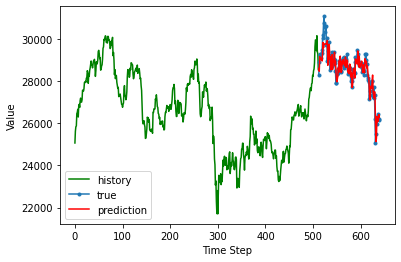

In [9]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [10]:
mean_absolute_percentage_error(y_test,y_pred)

0.011524177082211106

In [11]:
mean_squared_error(y_test,y_pred)

177272.7552730187

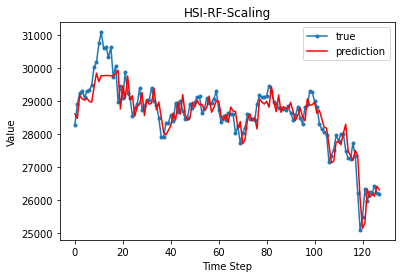

In [12]:
# y_test = sc.inverse_transform(y_test)
# y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-RF-Scaling')
plt.legend()
plt.show();

In [13]:
mean_absolute_percentage_error(y_test,y_pred)

0.011524177082211106

In [14]:
mean_squared_error(y_test,y_pred,squared=False)

421.0377124118678

In [15]:
r2_score(y_test,y_pred)

0.8319735460692692